# Simulated Alexandrines

Code and data for the Appendix

In [1]:
%load_ext rpy2.ipython

In [2]:
import pandas as pd
from collections import Counter
import metronome as met

## Load Data

These data are generated elsewhere and imported as a TSV

In [3]:
df = pd.read_csv("data/sim_alexandrines_metronome.tsv", sep="\t", keep_default_na=False)
df

,df,metronome
0,alex-1,w.SwS.wS.wS.wS.wS|wS.wS.wS.w.SwS.w.S|wS.wS.wS....
1,alex-2,wSw.SwS.w.Sw.Sw.S|wSw.Sw.S.wSw.Sw.S|wS.wSw.S.w...
2,alex-3,w.S.wSw.S.wSw.Sw.S|w.Sw.SwS.wS.wSw.S|wS.wS.wS....
3,alex-4,wS.w.Sw.S.wS.wSw.S|wS.wS.wS.wSwS.w.S|wS.wSw.S....
4,alex-5,wS.wS.wS.wSw.S.wS|w.S.wS.wS.wSw.Sw.S|wSw.Sw.S....
...,...,...
95,alexRomantic-16,SS.SS.wS.wS.wS.SS|Sw.w.S.Sw.SS.www.S|wS.wS.Sw....
96,alexRomantic-17,Sw.S.S.ww.SS.w.S.wS|wS.S.S.SS.SS.SSw.S|w.Sw.S....
97,alexRomantic-18,ww.wS.Sw.wS.S.ww.S|www.S.wSS.S.ww.SS|S.ww.S.SS...
98,alexRomantic-19,wS.wS.wSw.S.ww.wS|SS.wS.w.SS.S.wSS.S|Sw.SS.wS....


## Setup Metronome Scorer and calculate distance matrix

In [4]:
scorer = met.scoring.Scorer()
dm = scorer.dist_matrix_parallel(df)
dm

2024-04-22 11:36:08,574	INFO worker.py:1673 -- Started a local Ray instance.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000000,0.331357,0.317119,0.324464,0.307949,0.286056,0.299699,0.332712,0.371854,0.302476,...,0.484744,0.537584,0.563663,0.513649,0.536713,0.501949,0.517881,0.554688,0.521632,0.547020
1,0.331357,0.000000,0.299078,0.281950,0.337945,0.305007,0.300395,0.279315,0.334651,0.354414,...,0.490777,0.484848,0.539526,0.492095,0.538208,0.528327,0.479578,0.536232,0.540843,0.539526
2,0.317119,0.299078,0.000000,0.314932,0.345023,0.300797,0.298643,0.333710,0.333710,0.317008,...,0.468012,0.514780,0.561214,0.529572,0.526807,0.513645,0.554676,0.509766,0.555064,0.554299
3,0.324464,0.281950,0.314932,0.000000,0.355044,0.300000,0.327244,0.316918,0.330421,0.294403,...,0.503445,0.583193,0.561704,0.508644,0.544289,0.537037,0.555203,0.535156,0.575221,0.548451
4,0.307949,0.337945,0.345023,0.355044,0.000000,0.313944,0.294804,0.357675,0.383730,0.320775,...,0.500492,0.561655,0.576885,0.510009,0.542541,0.547271,0.522660,0.536133,0.558014,0.559064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.501949,0.528327,0.513645,0.537037,0.547271,0.501949,0.537037,0.544834,0.567739,0.530678,...,0.460138,0.462963,0.502938,0.484405,0.522145,0.000000,0.473197,0.519043,0.545231,0.488304
96,0.517881,0.479578,0.554676,0.555203,0.522660,0.526693,0.537651,0.543219,0.552090,0.519376,...,0.508366,0.496199,0.498531,0.490446,0.453963,0.473197,0.000000,0.511719,0.482793,0.481994
97,0.554688,0.536232,0.509766,0.535156,0.536133,0.525879,0.530273,0.525391,0.554688,0.536598,...,0.494141,0.488770,0.475098,0.498047,0.508741,0.519043,0.511719,0.000000,0.494141,0.474121
98,0.521632,0.540843,0.555064,0.575221,0.558014,0.503441,0.528024,0.504916,0.566863,0.575888,...,0.529007,0.437561,0.554572,0.519666,0.506410,0.545231,0.482793,0.494141,0.000000,0.464110


## Post-process and visualize

In [5]:
df.columns = ["name", "metronome"]
df["node"] = df.index + 1
df

,name,metronome,node
0,alex-1,w.SwS.wS.wS.wS.wS|wS.wS.wS.w.SwS.w.S|wS.wS.wS....,1
1,alex-2,wSw.SwS.w.Sw.Sw.S|wSw.Sw.S.wSw.Sw.S|wS.wSw.S.w...,2
2,alex-3,w.S.wSw.S.wSw.Sw.S|w.Sw.SwS.wS.wSw.S|wS.wS.wS....,3
3,alex-4,wS.w.Sw.S.wS.wSw.S|wS.wS.wS.wSwS.w.S|wS.wSw.S....,4
4,alex-5,wS.wS.wS.wSw.S.wS|w.S.wS.wS.wSw.Sw.S|wSw.Sw.S....,5
...,...,...,...
95,alexRomantic-16,SS.SS.wS.wS.wS.SS|Sw.w.S.Sw.SS.www.S|wS.wS.Sw....,96
96,alexRomantic-17,Sw.S.S.ww.SS.w.S.wS|wS.S.S.SS.SS.SSw.S|w.Sw.S....,97
97,alexRomantic-18,ww.wS.Sw.wS.S.ww.S|www.S.wSS.S.ww.SS|S.ww.S.SS...,98
98,alexRomantic-19,wS.wS.wSw.S.ww.wS|SS.wS.w.SS.S.wSS.S|Sw.SS.wS....,99


In [6]:
df["metre"] = df.name.str.extract("(^.*)-")

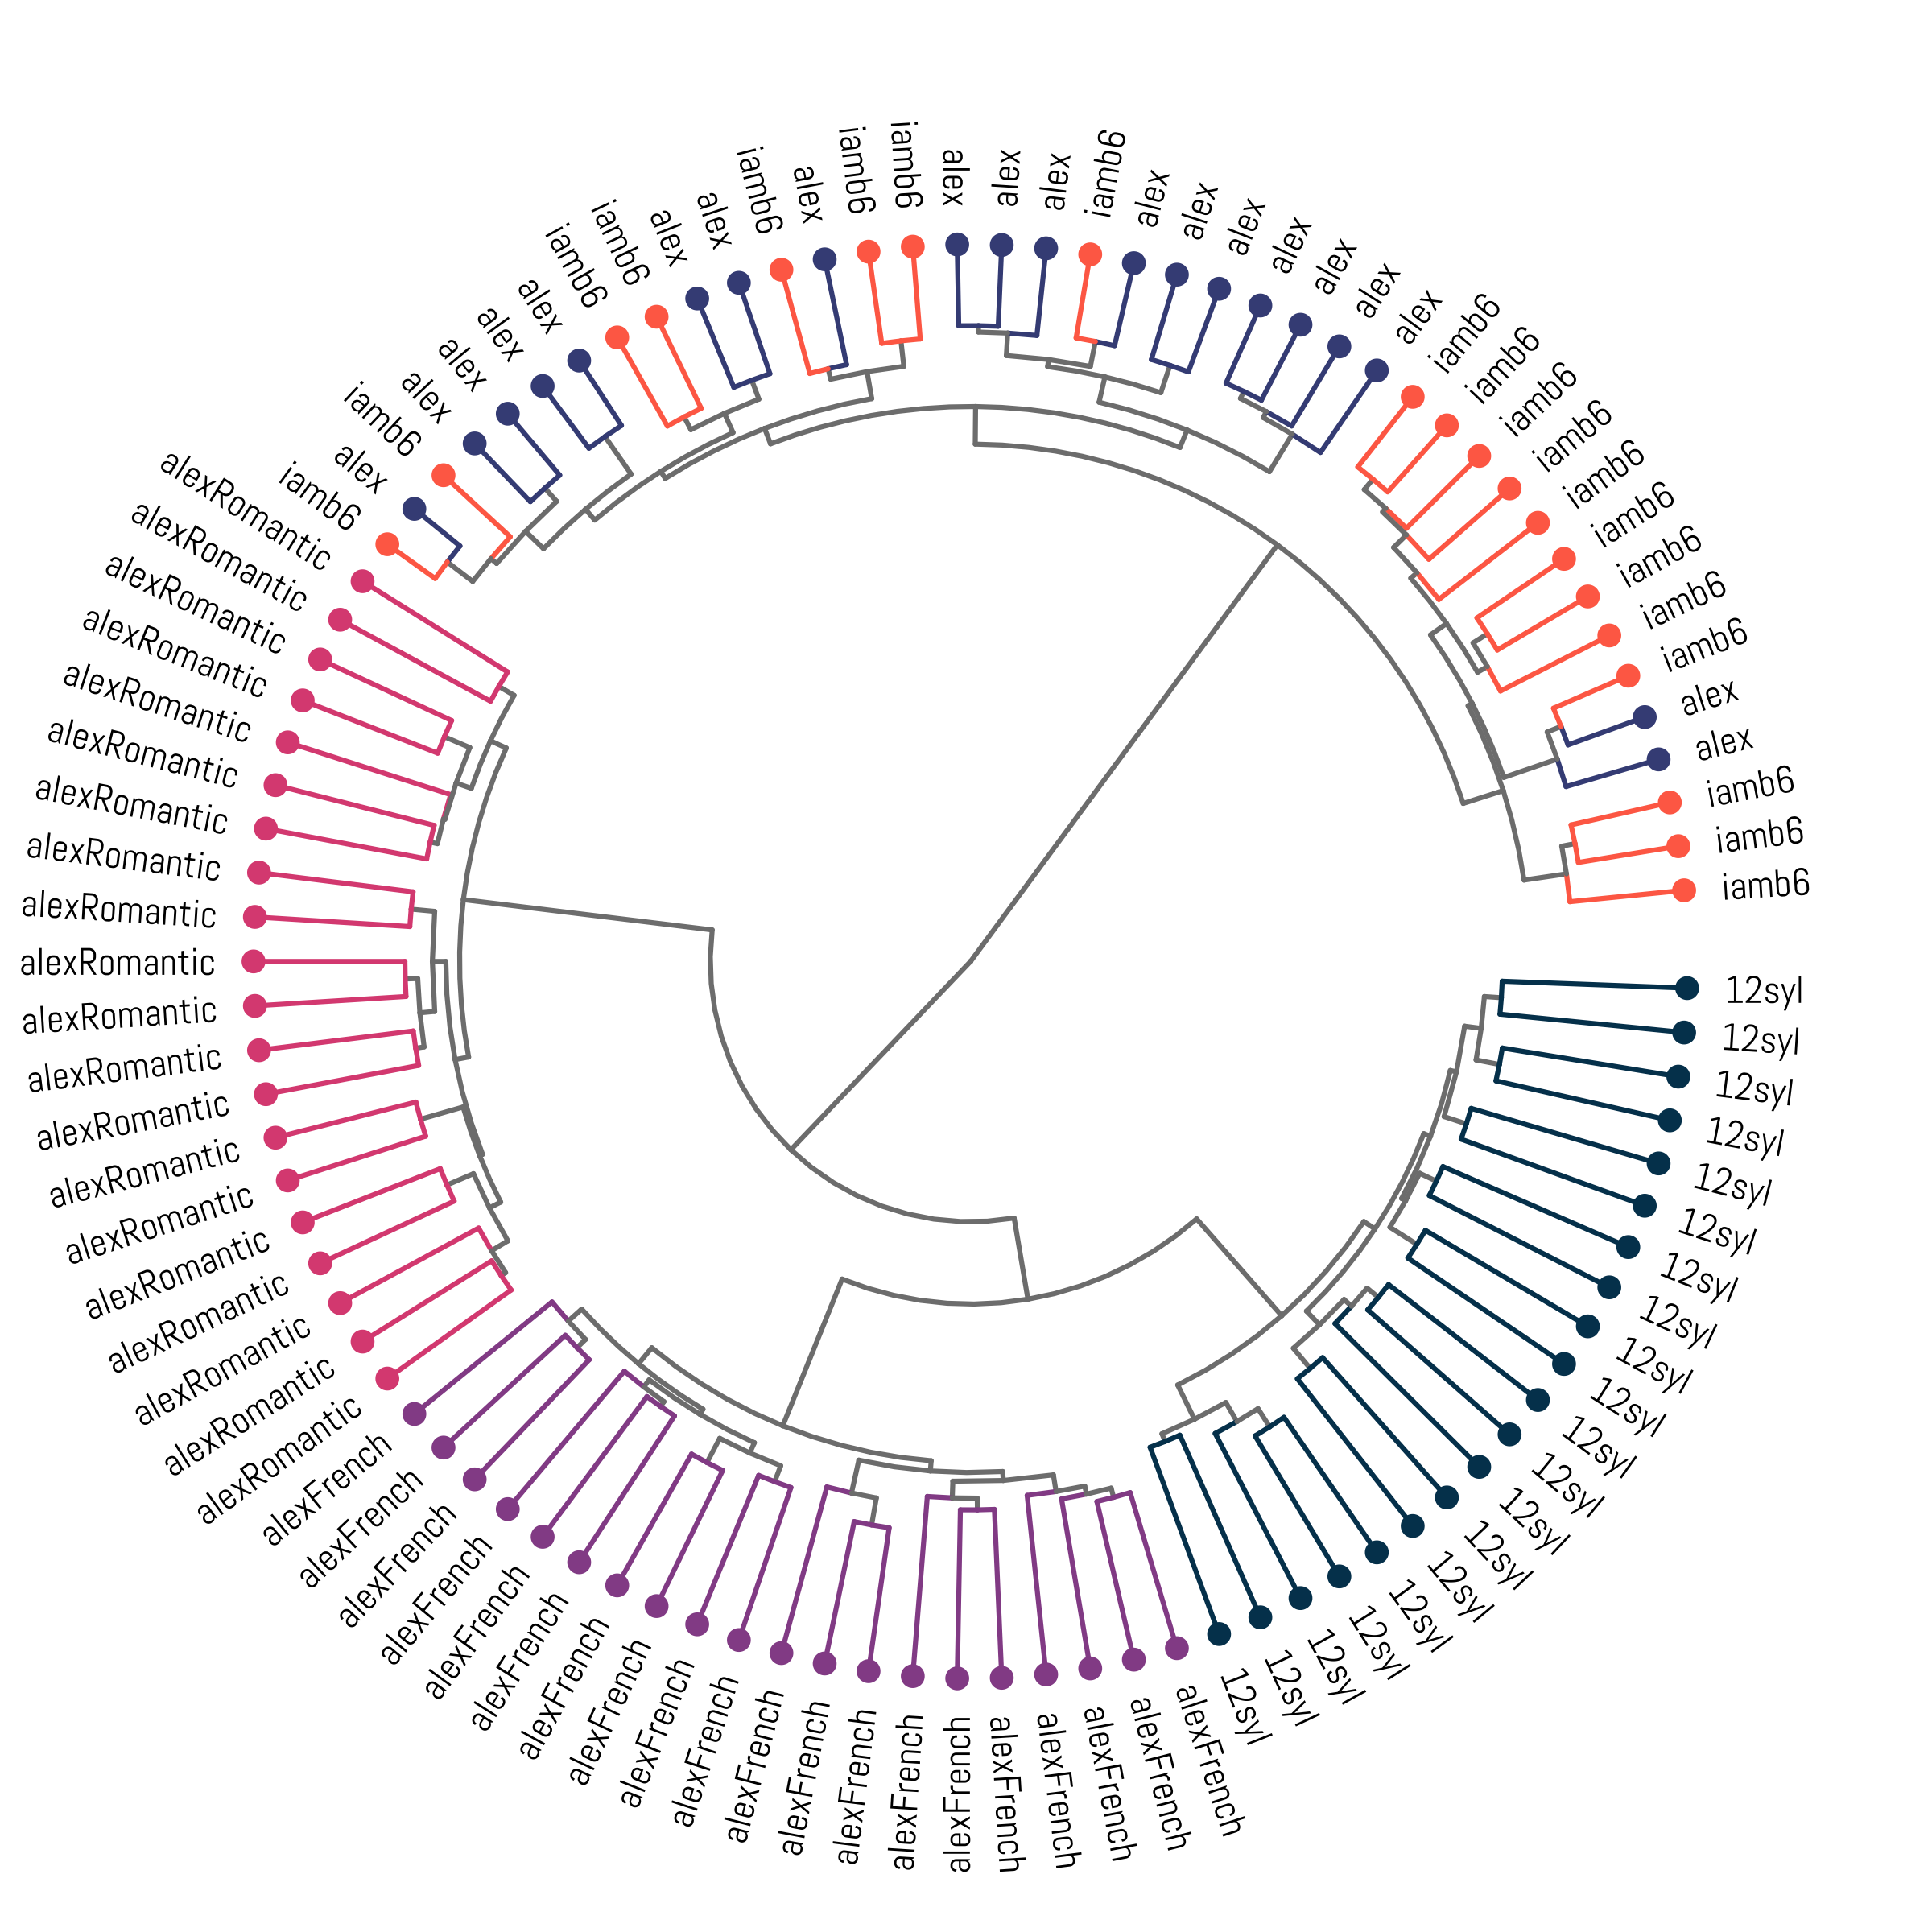

In [9]:
%%R -i dm,df -h 8 -w 8 -u in -r 300

library(ggplot2)
library(dplyr)
library(ggtree)
library(showtext)
library(paletteer)
library(ape)
library(ggnewscale)

showtext_auto()
font_add_google("Abel", "fnt")
plt <- paletteer::paletteer_d("ggsci::category20_d3")
plt <- c(
    "#003f5c",
    "#444e86",
    "#955196",
    "#dd5182",
    "#ff6e54",
    "#ffa600"
)
# rename to easy copy/paste
m <- dm
df <- df
dm <- as.dist(m)

# do the clustering
hc <- hclust(dm,method='ward.D2')
# this %<+% operator is a magic ggtree thing that left joins the metadata to the
# tree using the 'node' column so we can access it for labels
p <- ggtree(hc,layout="circular",aes(color=metre),size=0.7,ladderize=T) %<+% df +
geom_tippoint(aes(color=metre),shape=16,size=3,show.legend=F) +
scale_color_manual(values=plt) +
geom_tiplab(
    aes(label=metre),
    family='fnt',
    align=F,
    size=4,
    linetype='dotted',
    color='black',
    linesize=0.1,
    offset=0.1
) +
theme_tree(legend.position = "none")

# fn <- "sim_alexandrines.pdf"
# ggsave(fn, plot = p, dpi=600, width=8, height=8, device=cairo_pdf)

p
